In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
df1 = pd.read_csv('movie_industry.csv', encoding='latin-1') 
df1.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [3]:
df1.head(2)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986


In [4]:
df1.tail(2)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016
6819,0.0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016


In [5]:
df1.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [6]:
df1.isna().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [7]:
df1.fillna(0)
df1.isna().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

**1. Remove Duplicate Rows**

In [8]:
sum(df1.duplicated())

0

In [9]:
df1.drop_duplicates(inplace = True)
print("Afetr Removing Duplicate Values (Rows,Columns) : ", df1.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (6820, 15)


**2. Changing Format Of Release Date Into Datetime Format**

In [10]:
df1['released'] = pd.to_datetime(df1['released'])
df1['released'].head()

0   1986-08-22
1   1986-06-11
2   1986-05-16
3   1986-07-18
4   1986-08-01
Name: released, dtype: datetime64[ns]

**3. Drop theses rows which contain incorrect or inappropriate values.**

In [11]:
print("Rows With Zero Values In The Budget Column:",df1[(df1['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df1[(df1['gross']==0)].shape[0])

Rows With Zero Values In The Budget Column: 2182
Rows With Zero Values In The Revenue Column: 0


In [12]:
df = df1[df1['budget'] != 0]
df.shape

(4638, 15)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 : Which year has the highest release of movies?

year
2012    220
2013    220
2014    220
2015    220
2016    220
Name: name, dtype: int64


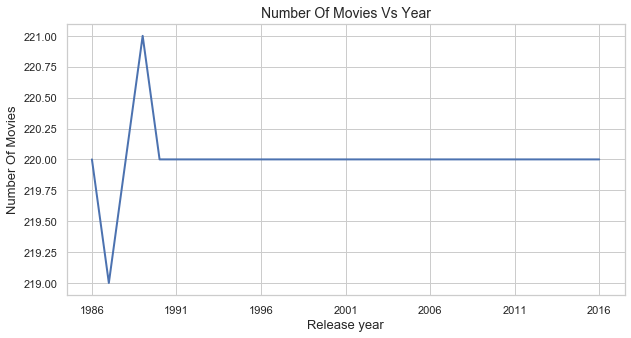

In [14]:
# make group for each year and count the number of movies in each year 
data=df1.groupby('year').count()['name']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
df1.groupby('year').count()['name'].plot(xticks = np.arange(1986,2017,5), linewidth = 2)

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Number Of Movies Vs Year",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")
# plt.savefig('nbmoviesvsyear.jpg', bbox_inches='tight', dpi=500) 

### Question 2 : Which Movie Has The Highest Or Lowest Profit?

In [226]:
df['Profit'] = df['gross'] - df['budget']

C:\Users\tonyt\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['name'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['name'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Star Wars: The Force Awakens
Movie Which Has Lowest Profit  :  John Carter


,6380,5757
budget,2.45e+08,2.5e+08
company,Lucasfilm,Walt Disney Pictures
country,USA,USA
director,J.J. Abrams,Andrew Stanton
genre,Action,Action
gross,9.36662e+08,7.30781e+07
name,Star Wars: The Force Awakens,John Carter
rating,PG-13,PG-13
released,2015-12-18 00:00:00,2012-03-09 00:00:00
runtime,136,132


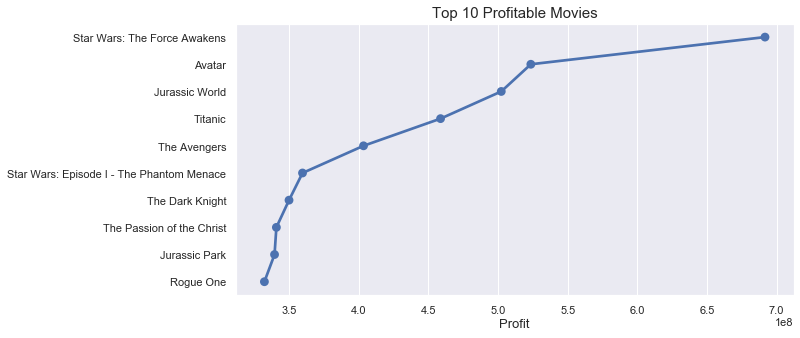

In [218]:
info = pd.DataFrame(df['Profit'].sort_values(ascending = False))
info['name'] = df['name']
data = list(map(str,(info['name'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")
# plt.savefig('top10profits.jpg', bbox_inches='tight', dpi=500) 

### Question 3 : Movie with Highest And Lowest Budget?

In [20]:
df['budget'] = df['budget'].replace(0,np.NAN)
find_minmax('budget')

Movie Which Has Highest budget :  Pirates of the Caribbean: At World's End
Movie Which Has Lowest budget  :  Following


C:\Users\tonyt\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,4631,2692
budget,3e+08,6000
company,Walt Disney Pictures,Next Wave Films
country,USA,UK
director,Gore Verbinski,Christopher Nolan
genre,Action,Crime
gross,3.0942e+08,48482
name,Pirates of the Caribbean: At World's End,Following
rating,PG-13,R
released,2007-05-25 00:00:00,1999-11-05 00:00:00
runtime,169,69


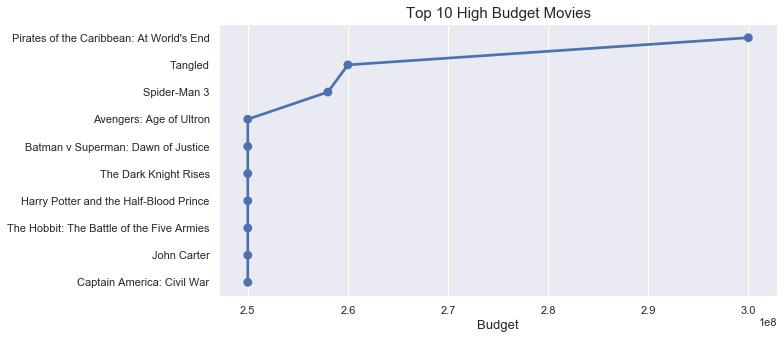

In [23]:
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['name'] = df['name']
data = list(map(str,(info['name'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")
plt.savefig('top10budgets.jpg', bbox_inches='tight', dpi=500) 

### Question 4 : Movie with Largest And Lowest Earned Revenue?

In [24]:
find_minmax('gross')

Movie Which Has Highest gross :  Star Wars: The Force Awakens
Movie Which Has Lowest gross  :  Trojan War


,6380,2594
budget,2.45e+08,1.5e+07
company,Lucasfilm,Daybreak
country,USA,USA
director,J.J. Abrams,George Huang
genre,Action,Comedy
gross,9.36662e+08,309
name,Star Wars: The Force Awakens,Trojan War
rating,PG-13,PG-13
released,2015-12-18 00:00:00,1997-10-01 00:00:00
runtime,136,84


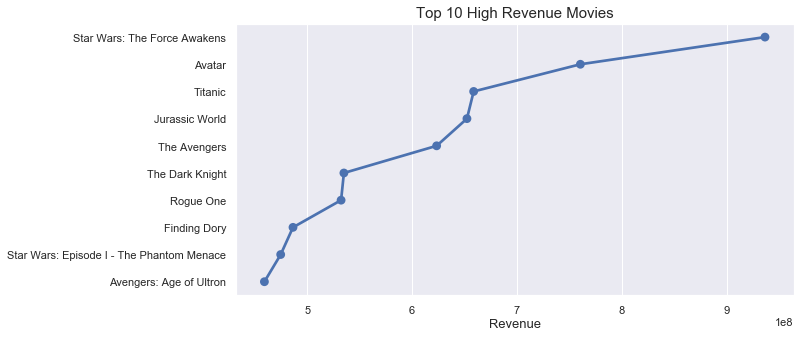

In [216]:
info = pd.DataFrame(df['gross'].sort_values(ascending = False))
info['name'] = df['name']
data = list(map(str,(info['name'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['gross'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")
# plt.savefig('top10revenue.jpg', bbox_inches='tight', dpi=500) 

### Question 5 : Movie with Longest And Shortest Rintime?

In [27]:
df1['runtime'] = df1['runtime'].replace(0,np.NAN)
find_minmax('runtime')

Movie Which Has Highest runtime :  Until the End of the World
Movie Which Has Lowest runtime  :  The Land Before Time


,1190,464
budget,2.3e+07,1.25e+07
company,Argos Films,Universal Pictures
country,Germany,USA
director,Wim Wenders,Don Bluth
genre,Action,Animation
gross,752856,4.80928e+07
name,Until the End of the World,The Land Before Time
rating,R,G
released,1991-12-25 00:00:00,1988-11-18 00:00:00
runtime,280,69


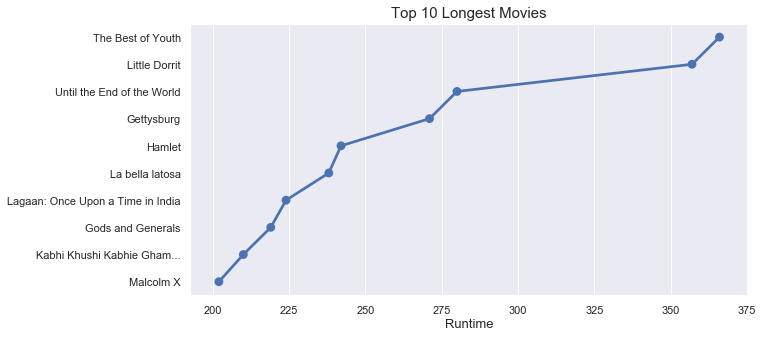

In [30]:
info = pd.DataFrame(df1['runtime'].sort_values(ascending = False))
info['name'] = df1['name']
data = list(map(str,(info['name'])))

#extract the top 10 longest duraton movies data from the list and dataframe.
x = list(data[:10])
y = list(info['runtime'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")
plt.savefig('top10longest.jpg', bbox_inches='tight', dpi=500) 

### Question 6 : Movie with Highest And Lowest Votes?

In [32]:
find_minmax('votes')

Movie Which Has Highest votes :  The Shawshank Redemption
Movie Which Has Lowest votes  :  Sky Bandits


,1760,199
budget,2.5e+07,1.8e+07
company,Castle Rock Entertainment,J&M; Entertainment
country,USA,UK
director,Frank Darabont,Zoran Perisic
genre,Crime,Action
gross,2.83415e+07,2.2955e+06
name,The Shawshank Redemption,Sky Bandits
rating,R,PG
released,1994-10-14 00:00:00,1986-10-31 00:00:00
runtime,142,100


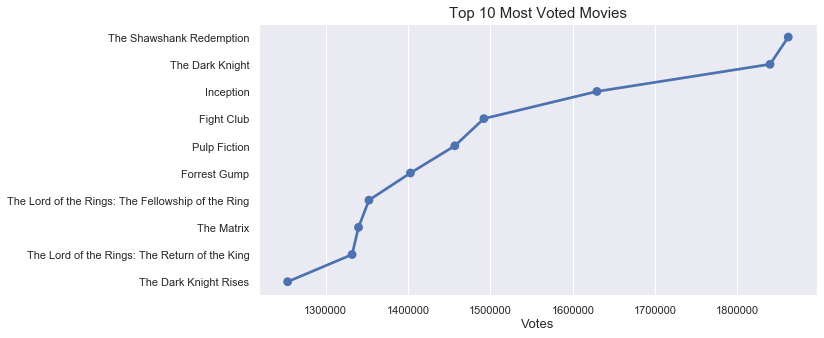

In [36]:
info = pd.DataFrame(df1['votes'].sort_values(ascending = False))
info['name'] = df1['name']
data = list(map(str,(info['name'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['votes'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Most Voted Movies",fontsize = 15)
ax.set_xlabel("Votes",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")
plt.savefig('top10voted.jpg', bbox_inches='tight', dpi=500) 

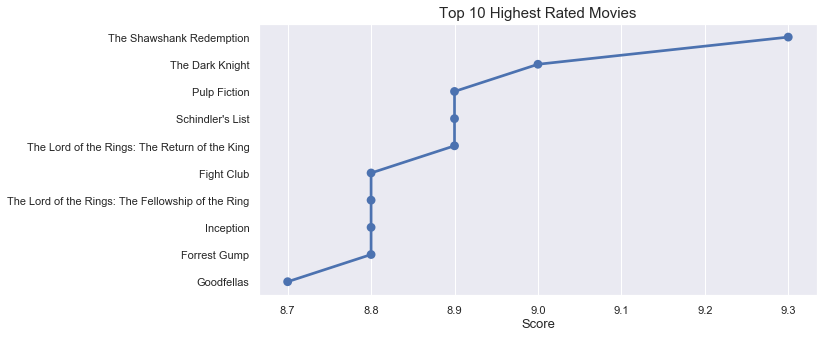

In [102]:
info = pd.DataFrame(df1['score'].sort_values(ascending = False))
info['name'] = df1['name']
data = list(map(str,(info['name'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['score'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Score",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")
plt.savefig('top10rated.jpg', bbox_inches='tight', dpi=500) 

### Question 7 : Which Year Has The Highest Profit Rate?

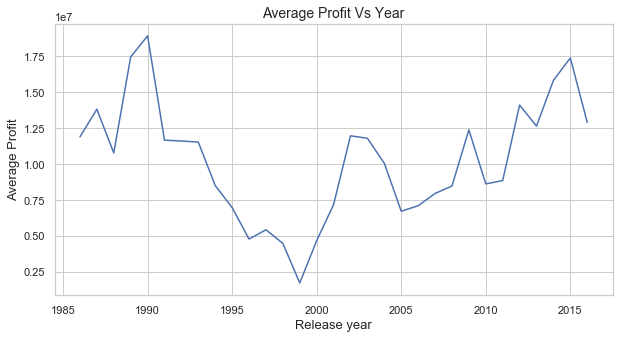

In [152]:
df.groupby('year')['Profit'].mean().plot()

#setup the title and labels of the figure.
plt.title("Average Profit Vs Year",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")
plt.savefig('avgprofitvsyear.jpg', bbox_inches='tight', dpi=500) 

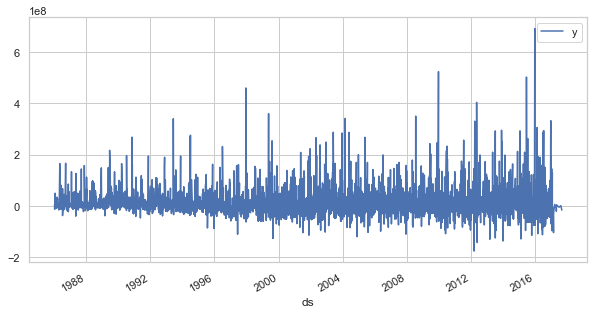

In [184]:
gm = pd.read_csv('movie_industry.csv', encoding='latin-1') 
gm = gm[gm['budget'] != 0]
gm['released'] = pd.to_datetime(gm['released'])
gm['Profit'] = gm['gross'] - gm['budget']
# gm = pd.DataFrame(gm.groupby('released')['Profit'].mean())
gm.reset_index(level=0, inplace=True)
gm.sort_values(by=['released'])
gm = gm.rename(columns={'released': 'ds', 'Profit': 'y'})
gm.plot(x='ds',y='y')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


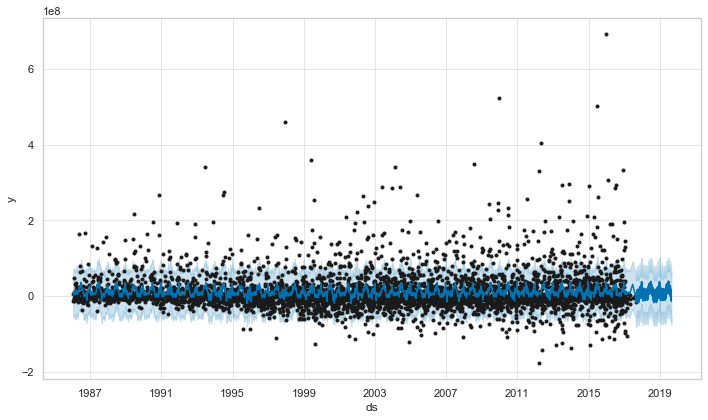

In [185]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
# Put market cap in billions
# gm['y'] = gm['y'] / 1e9
# Make the prophet model and fit on the data
m = Prophet(changepoint_prior_scale=0.01).fit(gm)
future = m.make_future_dataframe(periods=2*365, freq='D')
fcst = m.predict(future)
fig = m.plot(fcst)
# plt.savefig('forecastavgprofitperyear.jpg', bbox_inches='tight', dpi=500) 

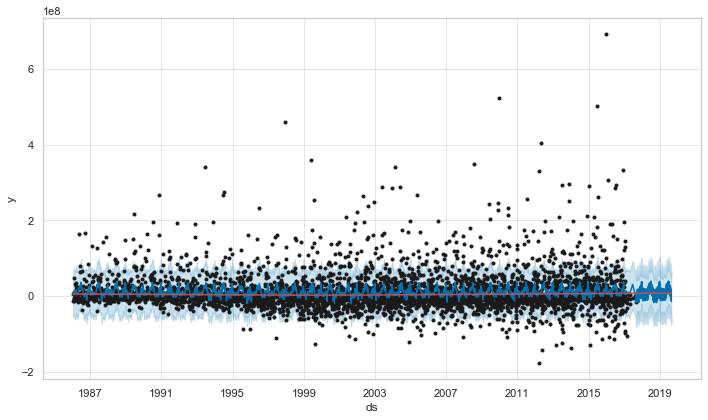

In [188]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

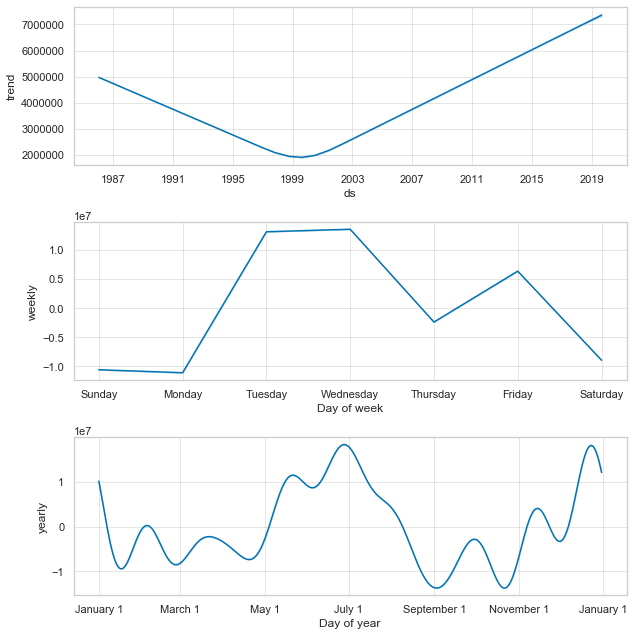

In [182]:
fig = m.plot_components(fcst)

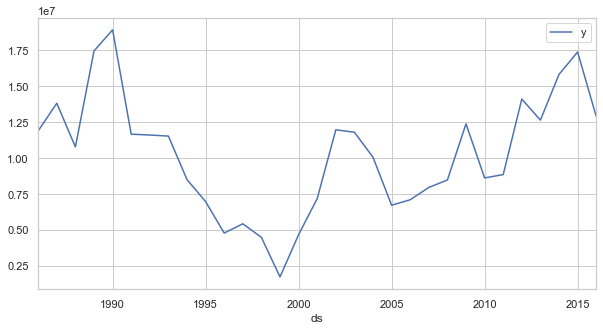

In [189]:
gm = pd.read_csv('movie_industry.csv', encoding='latin-1') 
gm = gm[gm['budget'] != 0]
gm['year'] = pd.to_datetime((df.year*10000+100+1).apply(str),format='%Y%m%d')
# gm['year'] = pd.to_datetime(gm['year'])
gm['Profit'] = gm['gross'] - gm['budget']
gm = pd.DataFrame(gm.groupby('year')['Profit'].mean())
gm.reset_index(level=0, inplace=True)
gm.sort_values(by=['year'])
gm = gm.rename(columns={'year': 'ds', 'Profit': 'y'})
gm.plot(x='ds',y='y')

In [ ]:
m = Prophet(changepoint_prior_scale=0.00001).fit(gm)
future = m.make_future_dataframe(periods=365*3)
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Question 8 : Which length movies most liked by the audiences according to their popularity?

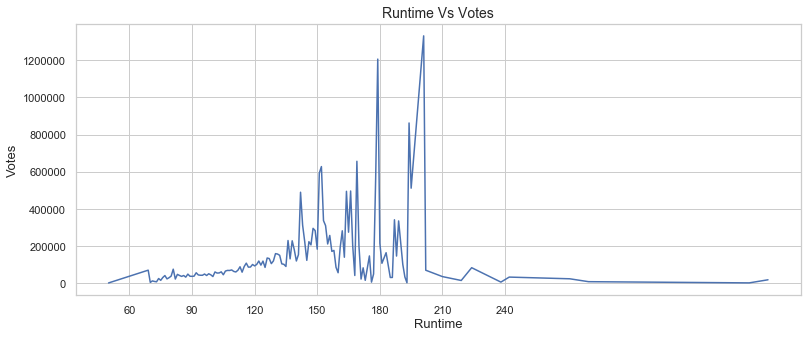

In [199]:
df1.groupby('runtime')['votes'].mean().plot(figsize = (13,5),xticks=np.arange(60,300,30))

#setup the title of the figure
plt.title("Runtime Vs Votes",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Votes',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")
# plt.savefig('runtimevsvotes.jpg', bbox_inches='tight', dpi=500) 

### Question 9: Average Runtime Of Movies From Year To Year?

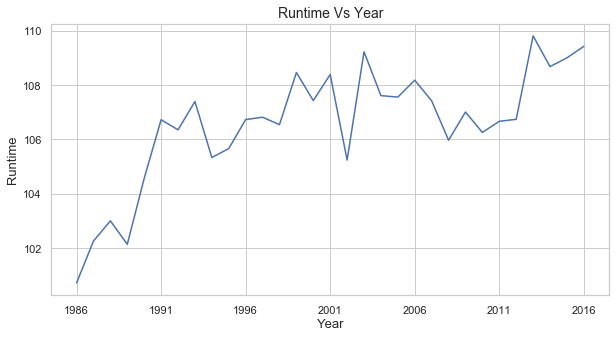

In [201]:
#how the runtime of the movies differ year to year.

#make the group of the data according to their release_year and find the mean  related to this and plot.
df1.groupby('year').mean()['runtime'].plot(xticks = np.arange(1986,2017,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")
plt.savefig('runtimevsyear.jpg', bbox_inches='tight', dpi=500) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


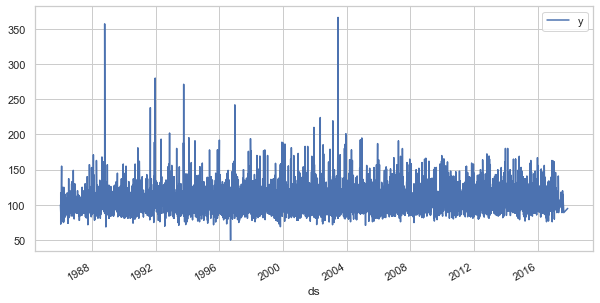

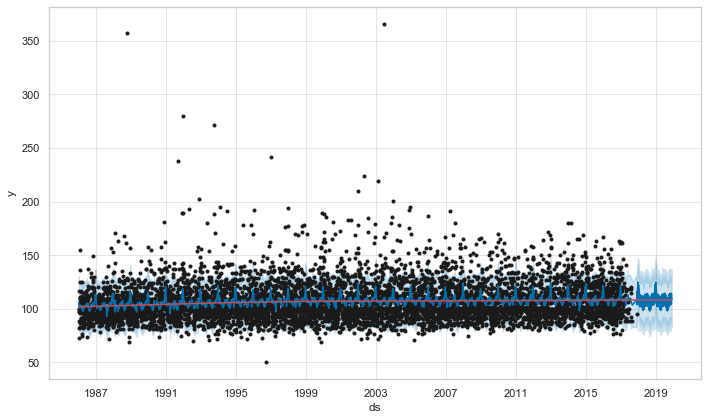

In [203]:
gm = pd.read_csv('movie_industry.csv', encoding='latin-1') 
# gm = gm[gm['budget'] != 0]
gm['released'] = pd.to_datetime(gm['released'])
gm = gm[['released','runtime']]
# gm['Profit'] = gm['gross'] - gm['budget']
# gm = pd.DataFrame(gm.groupby('released')['Profit'].mean())
# gm.reset_index(level=0, inplace=True)
gm.sort_values(by=['released'])
gm = gm.rename(columns={'released': 'ds', 'runtime': 'y'})
gm.plot(x='ds',y='y')
import fbprophet
m = Prophet(changepoint_prior_scale=0.01).fit(gm)
future = m.make_future_dataframe(periods=2*365, freq='D')
fcst = m.predict(future)
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

### Question 10: How Do The Revenue And Votes differ Budget And Runtime? And How Do Votes Depend On Profit?

C:\Users\tonyt\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\tonyt\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\tonyt\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Correlation Between Revenue And Budget :  0.6800325594458487


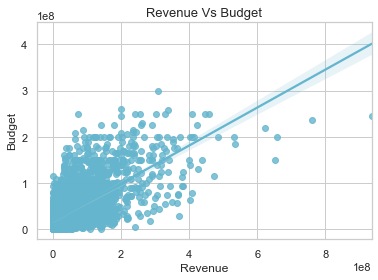

In [213]:
#how does revenue change according to their budget.
#make a scatter plot using 'regplot' between ''revenue' and 'budget'.
ax = sns.regplot(x=df['gross'], y=df['budget'],color='c')

#set the title and labels of the figure
ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#find the correlation between them
#change zero into NAN in budget and revenue column for the exact calculation.
df['budget'] = df['budget'].replace(0,np.NAN)
df['gross'] = df['gross'].replace(0,np.NAN)
df['Profit'] = df['Profit'].replace(0,np.NAN)

#find the correlation using 'corr()' function.
#it returns a dataframe which contain the correlation between all the numeric columns.
data_corr = df.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['gross','budget'])
# plt.savefig('corrbudgetrevenue.jpg', bbox_inches='tight', dpi=500) 

Correlation Between Profit And Budget :  0.10460586457203834


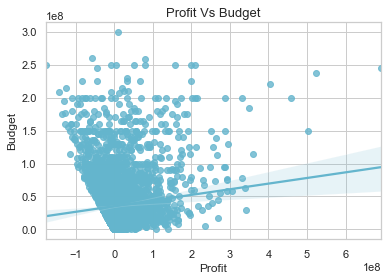

In [227]:
#how does profit change according to their budget.
#make a scatter plot using 'regplot' between 'profit' and 'budget'.
ax = sns.regplot(x=df['Profit'], y=df['budget'],color='c')

#setup the title and the labels of the plot.
ax.set_title("Profit Vs Budget",fontsize=13)
ax.set_xlabel("Profit",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)

#setup the figure size and style sheet of the plot.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#print the correction between them,which was stored in 'data_corr' dataframe earlier.
print("Correlation Between Profit And Budget : ",data_corr.loc['Profit','budget'])
# plt.savefig('corrbudgetprofit.jpg', bbox_inches='tight', dpi=500) 

Correlation Between Release Year And Votes :  0.18409550707831618


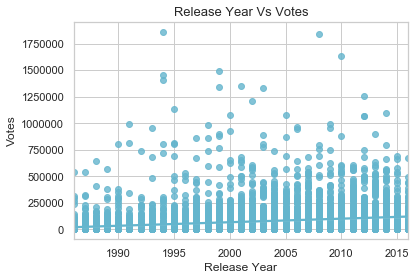

In [222]:
#how does vote average(ratings) change according to the release year.
#make a scatter plot using 'regplot' between 'year' and 'vote'.
ax = sns.regplot(x=df1['year'], y=df1['votes'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Release Year Vs Votes",fontsize=13)
ax.set_xlabel("Release Year",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)

#set the figure size and print the correlation between them.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
print("Correlation Between Release Year And Votes : ",data_corr.loc['year','votes'])
# plt.savefig('corryearvotes.jpg', bbox_inches='tight', dpi=500) 

Correlation Between Votes And Profit :  0.5028415649687468


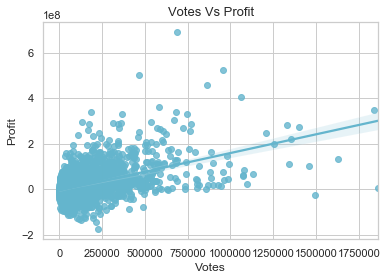

In [225]:
#how does vote average(ratings) change according to the release year.
#make a scatter plot using 'regplot' between 'year' and 'vote average'.
ax = sns.regplot(x=df['votes'],y=df['Profit'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Votes Vs Profit",fontsize=13)
ax.set_xlabel("Votes",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#find the correlation between them.
print("Correlation Between Votes And Profit : ",data_corr.loc['votes','Profit'])
plt.savefig('corrvotesprofit.jpg', bbox_inches='tight', dpi=500)

### Question 11: Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?

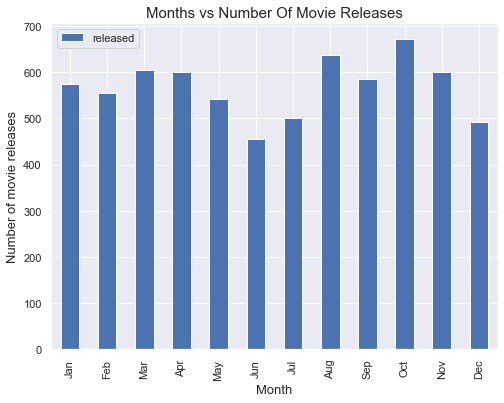

In [230]:
#extract the month number from the release date.
month_release = df1['released'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")
plt.savefig('monthsnbmovies.jpg', bbox_inches='tight', dpi=500) 

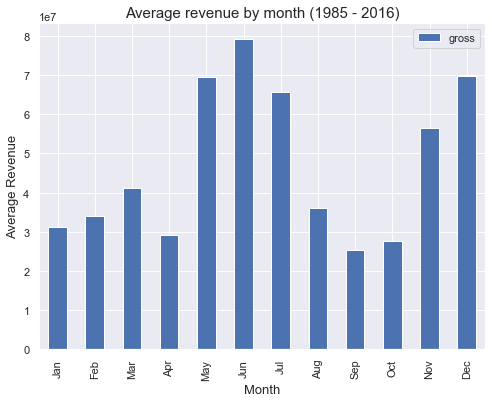

In [229]:
#which month made the highest average revenue?.
#make a dataframe with in which store the release month of each movie.
month_release = pd.DataFrame(month_release)

#change the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'released':'release_month'},inplace=True)

#add a new column 'revenue' in the dataframe 'month_release'.
month_release['gross'] = df['gross']

#make the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

#make the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average revenue by month (1985 - 2016)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")
plt.savefig('avgrevenuemonth.jpg', bbox_inches='tight', dpi=500) 

### Question 12:  Which Genre Has The Highest Release Of Movies?

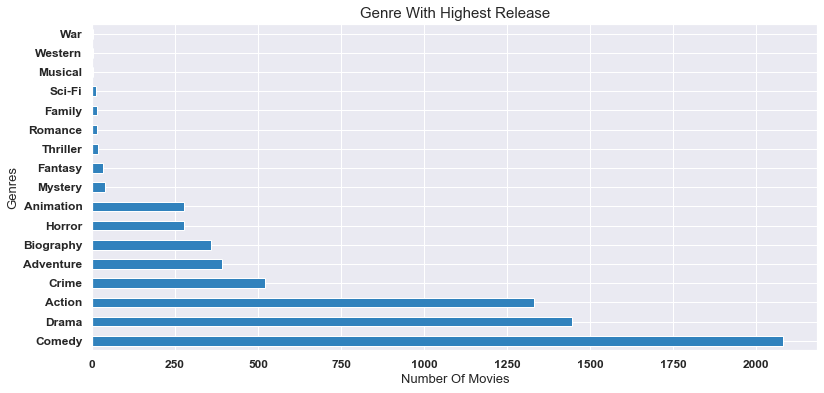

In [265]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df1[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genre')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("darkgrid")
# plt.savefig('genrehighestrelease.jpg', bbox_inches='tight', dpi=500) 

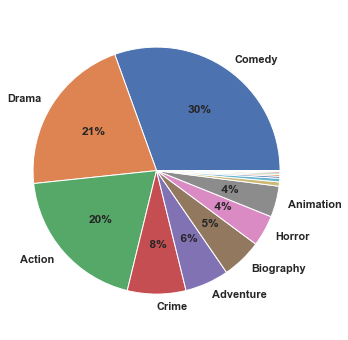

In [284]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.savefig('genrehighestrelease1.jpg', bbox_inches='tight', dpi=500) 

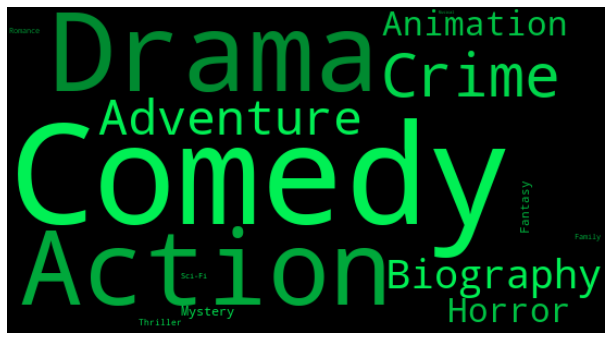

In [238]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

words = dict()
for s in genre_count:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
# plt.show()
plt.savefig('cloud.jpg', bbox_inches='tight', dpi=500) 

### Question 13: Which genres are most popular from year to year?

In [248]:
#map all the rows of genres in a list.
genre_details = list(map(str,(df['genre'])))
genre = ['Western', 'Romance', 'Family', 'Thriller', 'Sci-Fi', 'Fantasy', 'Mystery', 'Musical','Animation', 'Horror',  'Biography', 'Adventure', 'Crime', 'Drama', 'Action', 'Comedy']

#make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(df['year'])
popularity = np.array(df['votes'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1986, 2017))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [249]:
#calculate the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Western,-0.615760,-0.681629,-0.589135,-0.592580,-0.660445,-0.624819,-0.761598,-0.810839,-0.564957,-0.729511,...,-0.859264,-0.574225,-0.759254,-0.676691,-0.653238,-0.623299,-0.643528,-0.599666,-0.575007,-0.585724
Romance,-0.615760,-0.681629,-0.589135,-0.592580,-0.660445,-0.624819,-0.761598,-0.817214,-0.564957,-0.729511,...,-0.859264,-0.574225,-0.759254,-0.676691,-0.558282,-0.623299,-0.643528,-0.599666,-0.593869,-0.585724
Family,-0.615760,-0.681629,-0.581813,-0.580328,-0.660445,-0.624819,-0.761598,-0.814830,-0.558793,-0.729511,...,-0.859264,-0.574225,-0.759254,-0.676691,-0.653238,-0.623299,-0.643528,-0.599666,-0.593869,-0.585724
Thriller,-0.522141,-0.662551,-0.585249,-0.592580,-0.632064,-0.624819,-0.761598,-0.817214,-0.564957,-0.729511,...,-0.859264,-0.574225,-0.757200,-0.676691,-0.653238,-0.623299,-0.643528,-0.599666,-0.591053,-0.585724
Sci-Fi,-0.603690,-0.681629,-0.589135,-0.586129,-0.640661,-0.624819,-0.761598,-0.817214,-0.564957,-0.705884,...,-0.812170,-0.574225,-0.422232,-0.676691,-0.653238,-0.535424,-0.643528,-0.578065,-0.556657,-0.585724


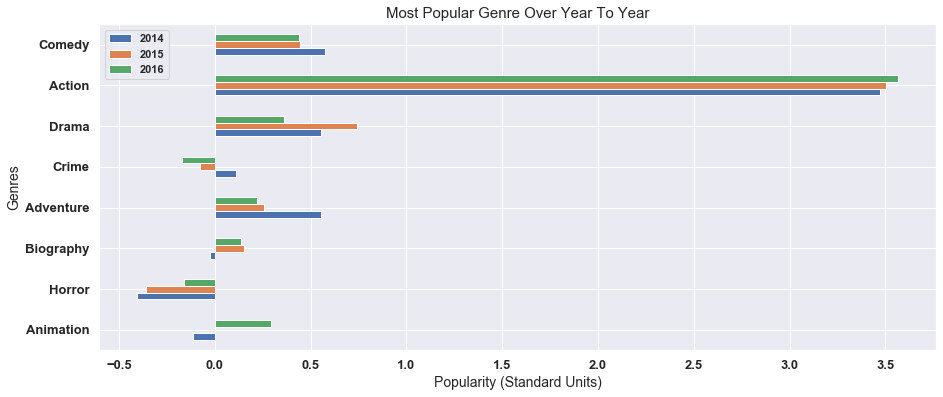

In [253]:
#plot the barh plot of the standardised data.
popular_genre.iloc[8:,28:].plot(kind='barh',figsize = (15,6),fontsize=13)

#setup the title and labels of the plot.
plt.title("Most Popular Genre Over Year To Year",fontsize=15)
plt.xlabel("Popularity (Standard Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("darkgrid")
plt.savefig('genreyearyear.jpg', bbox_inches='tight', dpi=500) 

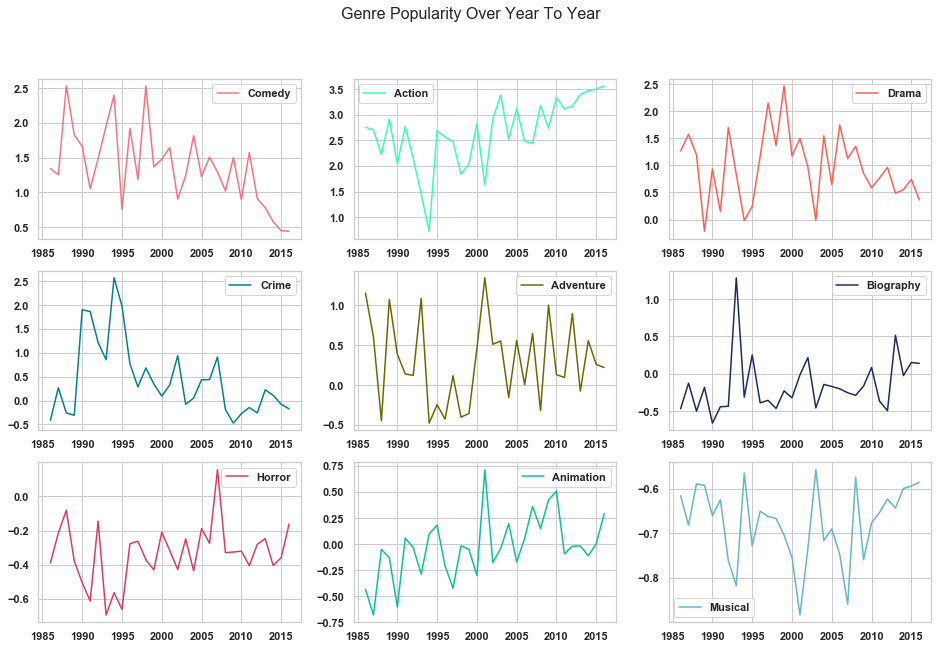

In [262]:
#How the popularity of the genre differ year by year.
sns.set_style("whitegrid")
#make a subplot of size 3,3.
fig, ax = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Popularity Over Year To Year',fontsize = 16)

#plot the 'Drama' genre plot see the popularity difference over year to year.
popular_genre.loc['Comedy'].plot(label = "Comedy",color = '#f67280',ax = ax[0][0],legend=True)

#plot the 'Action' genre plot see the popularity difference over year to year.
popular_genre.loc['Action'].plot(label = "Action",color='#33FFB5',ax = ax[0][1],legend=True)

#plot the 'Comedy' genre plot see the popularity difference over year to year.
popular_genre.loc['Drama'].plot(label = "Drama",color='#fe5f55',ax = ax[0][2],legend=True)

#accordig to the previous plot the 'Thriller','Science Fiction', 'Romance', 'Music','Adventure' and 'Crime'.
popular_genre.loc['Crime'].plot(label = "Crime",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Biography'].plot(label = "Biography",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Horror'].plot(label = "Horror",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Animation'].plot(label = "Animation",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Musical'].plot(label = "Musical",color='c',ax = ax[2][2],legend=True)
# plt.savefig('genreyearyear1.jpg', bbox_inches='tight', dpi=500) 

### Question 14: Most Frequent Actor?

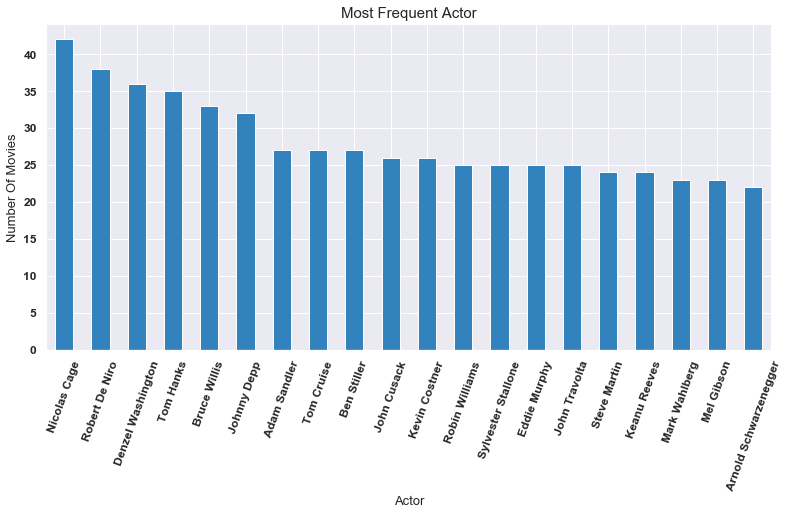

In [270]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_flims = count_genre('star')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("darkgrid")
plt.savefig('mostactor.jpg', bbox_inches='tight', dpi=500) 

### Question 15: Top 20 Production Companies With Higher Number Of Release?

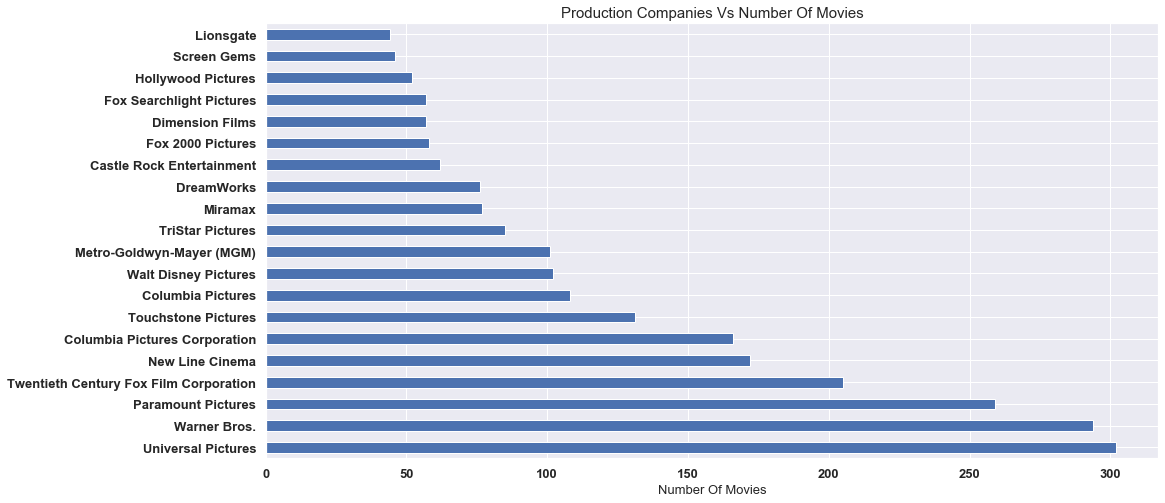

In [272]:
production_companies = count_genre('company')

#plot he barh plot.
production_companies.iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
sns.set_style("darkgrid")
plt.savefig('mostcompany.jpg', bbox_inches='tight', dpi=500)

### Question 16: Life Time Profit Earn By Each Production Company

In [275]:
##map all the rows of production_companies in a list.
data1 = list(map(str,(df['company'])))
production_companies = pd.DataFrame(production_companies)

#make the list of profit and production_companies which contain all the rows of profit and production_companies column. 
data3 = list(production_companies.index.values)
#append the nan in the data3 because production_companies row has null values also.
data3.append('nan')
df['Profit'] = df['Profit'].replace(np.NAN,0)
profit = np.array(df['Profit'])

#make a null dataframe which indexs are genres and has only one column Total Profit.
companies_df = pd.DataFrame(index = data3 ,columns =np.arange(0,1,1) )
#change all the values of the dataframe from NAN to zero.
companies_df = companies_df.fillna(value = 0.0)

z = 0
for i in data1:
    split_companies = list(map(str,i.split('|')))
    companies_df.loc[split_companies] = companies_df.loc[split_companies] + profit[z]
    z+=1

C:\Users\tonyt\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


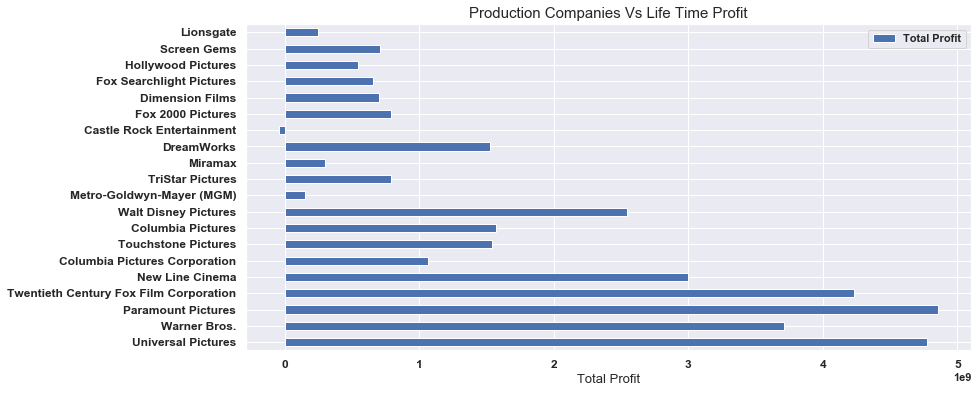

In [278]:
#Rename the column name 
companies_df = companies_df.rename(columns={0:'Total Profit'})
#plot the barh plot
companies_df[:20].plot.barh(figsize=(13,6),fontsize=12,legend=True)
plt.title("Production Companies Vs Life Time Profit",fontsize=15)
plt.xlabel('Total Profit',fontsize=13)
sns.set_style("darkgrid")
plt.savefig('earningscompanies.jpg', bbox_inches='tight', dpi=500)

### Question 17 :   Top 20 Director Who Directs Maximum Movies?

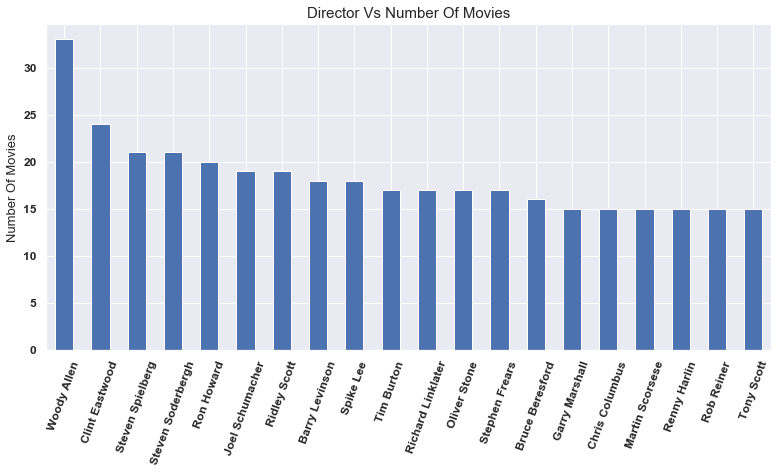

In [279]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies directed by each diretor.
count_director_movies = count_genre('director')

#plot a barh graph
count_director_movies.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("darkgrid")
plt.savefig('mostdirector.jpg', bbox_inches='tight', dpi=500)

### Question 18: Top 20 Countries With Higher Number Of Release?


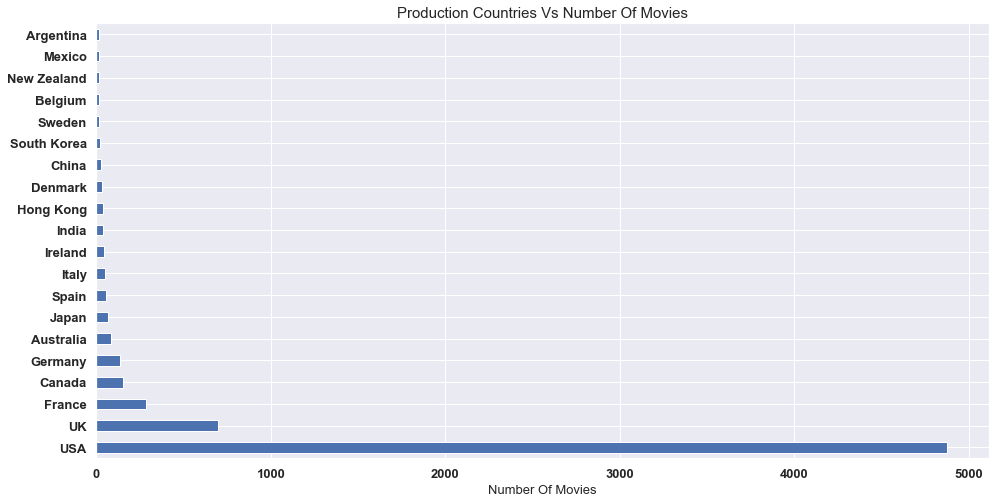

In [281]:
production_countries = count_genre('country')

#plot he barh plot.
production_countries.iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Countries Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
sns.set_style("darkgrid")
plt.savefig('mostcountry.jpg', bbox_inches='tight', dpi=500)

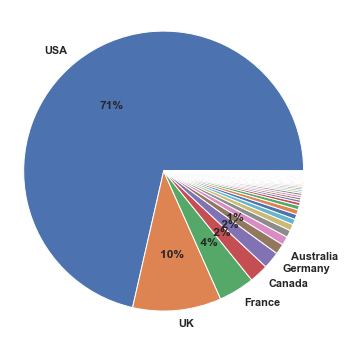

In [283]:
i = 0
genre_count = []
for genre in production_countries.index:
    genre_count.append([genre, production_countries[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.savefig('countryhighestrelease1.jpg', bbox_inches='tight', dpi=500) 

### Question 19: What kinds of properties are associated with movies that have high revenues?

In [285]:
info = pd.DataFrame(df['gross'].sort_values(ascending=False))
data_set = ['company','votes','budget','name','star','director','runtime','genre','writer','year']
for i in data_set:
    info[i] = df[i]
info.head(3)

,gross,company,votes,budget,name,star,director,runtime,genre,writer,year
6380,936662225.0,Lucasfilm,687192,245000000.0,Star Wars: The Force Awakens,Daisy Ridley,J.J. Abrams,136,Action,Lawrence Kasdan,2015
5061,760507625.0,Twentieth Century Fox Film Corporation,954412,237000000.0,Avatar,Sam Worthington,James Cameron,162,Action,James Cameron,2009
2420,658672302.0,Twentieth Century Fox Film Corporation,862554,200000000.0,Titanic,Leonardo DiCaprio,James Cameron,194,Drama,James Cameron,1997


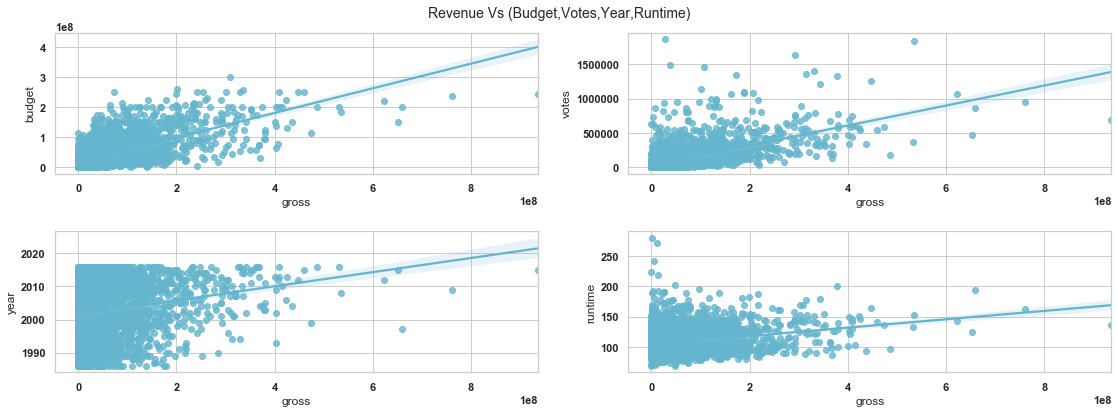

In [299]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Votes,Year,Runtime)",fontsize=14)
#info.plot(x = ['revenue'],y = ['budget'],kind = "scatter",ax = axes[0][0])
sns.regplot(x=df['gross'], y=df['budget'],color='c',ax=axes[0][0])
sns.regplot(x=df['gross'], y=df['votes'],color='c',ax=axes[0][1])
sns.regplot(x=df['gross'], y=df['year'],color='c',ax=axes[1][0])
sns.regplot(x=df['gross'], y=df['runtime'],color='c',ax=axes[1][1])
#axes.scatter(info['revenue'],info['vote_average'])
sns.set_style("whitegrid")
fig.tight_layout(pad=2)
plt.savefig('revenuevsmultiple.jpg', bbox_inches='tight', dpi=500) 

In [300]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

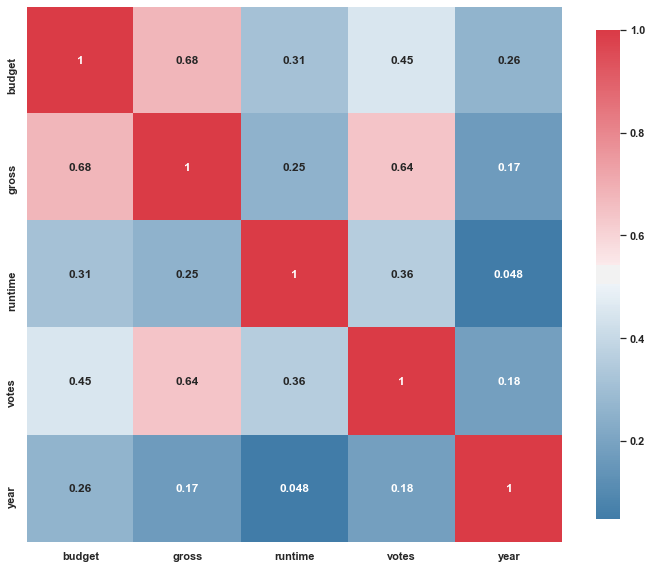

In [303]:
plot_correlation_map(df[['budget','gross','runtime','votes','year']])
plt.savefig('correlationmap.jpg', bbox_inches='tight', dpi=500) 